In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import csv
import numpy as np
import json
from sklearn.datasets import make_blobs
from collections import Counter


In [6]:
#Converted CSV to JSON data
csvfile = open('crime_data_csv.csv', 'r')
jsonfile = open('crime_data_csv.json', 'w')

fieldnames = ("case_no","date_of_occurrence","primary_description","arrests","domestic","ward")
reader = csv.DictReader( csvfile, fieldnames)
out = json.dumps( [ row for row in reader ] )
jsonfile.write(out)

10777087

In [7]:
# Read the CSV file into a Pandas DataFrame

notes = pd.read_csv('crime_data_csv.csv')
notes.head()

,case_no,date_of_occurrence,primary_description,arrests,domestic,ward
0,JE123460,1/26/2021,0,0,1,5
1,JE123503,1/26/2021,1,0,1,20
2,JE123996,1/26/2021,2,0,0,48
3,JE123507,1/26/2021,1,0,1,21
4,JE123544,1/26/2021,3,0,0,27


Logistic Regression

In [8]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape() to create this

X = notes[['primary_description','domestic','ward']]
y = notes['arrests']

print("Shape: ", X.shape, y.shape)

Shape:  (80006, 3) (80006,)


In [9]:
print(X)

       primary_description  domestic  ward
0                        0         1     5
1                        1         1    20
2                        2         0    48
3                        1         1    21
4                        3         0    27
...                    ...       ...   ...
80001                    1         1    42
80002                    5         0     3
80003                    1         1     5
80004                    1         1     7
80005                    6         0    14

[80006 rows x 3 columns]


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [11]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

classifier.fit(X_train, y_train)
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8763082461169256
Testing Data Score: 0.8763623637636236


Make redictions

In [12]:
print(f'Actual:\t\t{list(y_test[:10])}')
print(f'Predicted:\t{list(classifier.predict(X_test[:10]))}')

Actual:		[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Predicted:	[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [13]:
y_pred = classifier.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix, classification_report
matrix_1 = confusion_matrix(y_test, y_pred)
cm3_df = pd.DataFrame(
    matrix_1, index=["Actual Non Arrests", "Actual Arrests"], columns=["Predicted Non Arrests", "Predicted Arrests"])
cm3_df

,Predicted Non Arrests,Predicted Arrests
Actual Non Arrests,17525,3
Actual Arrests,2470,4


In [15]:
from imblearn.metrics import classification_report_imbalanced

print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.88      1.00      0.00      0.93      0.04      0.00     17528
          1       0.57      0.00      1.00      0.00      0.04      0.00      2474

avg / total       0.84      0.88      0.13      0.82      0.04      0.00     20002



In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8763623637636236

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
Counter(y_train)

Counter({0: 52597, 1: 7407})

RandomOverSampler

In [18]:
# Resample the training data with the RandomOverSampler
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [19]:
# Count to show data has been balanced
Counter(y_resampled)



Counter({0: 52597, 1: 52597})

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [21]:
from sklearn.metrics import confusion_matrix
y_preds = model.predict(X_test)
matrix_3 = confusion_matrix(y_test, y_preds)
cm4_df = pd.DataFrame(
    matrix_3, index=["Actual Non Arrests", "Actual Arrests"], columns=["Predicted Non Arrests", "Predicted Arrests"])
cm4_df

,Predicted Non Arrests,Predicted Arrests
Actual Non Arrests,12309,5205
Actual Arrests,1027,1461


In [22]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_preds)

0.6450139153720662

In [23]:
from imblearn.metrics import classification_report_imbalanced

print(classification_report_imbalanced(y_test, y_preds))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.92      0.70      0.59      0.80      0.64      0.42     17514
          1       0.22      0.59      0.70      0.32      0.64      0.41      2488

avg / total       0.84      0.69      0.60      0.74      0.64      0.42     20002



Easy Ensemble AdaBoost Classifier

In [24]:

# Train the EasyEnsembleClassifier
from imblearn.ensemble import EasyEnsembleClassifier

eec = EasyEnsembleClassifier(n_estimators=100, random_state=1)
eec.fit(X_train, y_train)


EasyEnsembleClassifier(n_estimators=100, random_state=1)

In [25]:
# Calculated the balanced accuracy score
from sklearn.metrics import accuracy_score

acc_score2 = accuracy_score(y_test, y_pred)
print(acc_score2)

0.8754624537546245


In [26]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
matrix_3 = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
    matrix_3, index=["Actual Non Arrests", "Actual Arrests"], columns=["Predicted Non Arrests", "Predicted Arrests"])
cm_df

,Predicted Non Arrests,Predicted Arrests
Actual Non Arrests,17509,5
Actual Arrests,2486,2


In [27]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced

print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.88      1.00      0.00      0.93      0.03      0.00     17514
          1       0.29      0.00      1.00      0.00      0.03      0.00      2488

avg / total       0.80      0.88      0.13      0.82      0.03      0.00     20002



In [28]:
crime_cluster = notes.drop(axis=0,columns=['case_no','date_of_occurrence'])
crime_cluster.head()

,primary_description,arrests,domestic,ward
0,0,0,1,5
1,1,0,1,20
2,2,0,0,48
3,1,0,1,21
4,3,0,0,27


In [29]:
count_of_columns = crime_cluster.count()
count_of_columns

primary_description    80006
arrests                80006
domestic               80006
ward                   80006
dtype: int64

In [30]:
count_of_columns = crime_cluster['ward'].count()
count_of_columns

80006

Analysis of Data after Running Logical Regression

In [31]:
new_csv = pd.read_csv('crime_data_csv.csv')
new_csv[new_csv['arrests'] == 1]['ward'].value_counts().to_csv('Ward_count_arrests.csv')
ward_count = pd.read_csv('Ward_count_arrests.csv')
ward_count = ward_count.rename(columns={'Unnamed: 0':'Ward_id','ward':'Arrests_counts'})
ward_count

,Ward_id,Arrests_counts
0,28,927
1,24,598
2,27,485
3,42,467
4,6,396
5,21,393
6,17,385
7,37,375
8,16,352
9,34,332


In [32]:
ward_avg = pd.read_csv('crime_data_csv.csv')
ward_avg[ward_avg['arrests'] == 0]['ward'].value_counts().to_csv('Ward_count_nonarrests.csv')
ward_count_non = pd.read_csv('Ward_count_nonarrests.csv')
ward_count_non = ward_count_non.rename(columns={'Unnamed: 0':'Ward_id','ward':'Non_arrest_counts'})
ward_count_non



,Ward_id,Non_arrest_counts
0,27,2943
1,28,2942
2,6,2754
3,42,2690
4,8,2478
5,24,2426
6,7,2350
7,20,2309
8,17,2254
9,21,2211


In [33]:
# Add prediected values onto the original dataframe
# combined_ward = pd.DataFrame(ward_count, columns=['Ward_id'])
# combined = ward_count_non.merge(combined_ward, how='right')
# combined_ward.head()
merge_database = ward_count.merge(ward_count_non, on='Ward_id', how='inner')
merge_database.head()

,Ward_id,Arrests_counts,Non_arrest_counts
0,28,927,2942
1,24,598,2426
2,27,485,2943
3,42,467,2690
4,6,396,2754


In [34]:
merge_database.sort_values('Arrests_counts', ascending=False, inplace = True)
merge_database.head(10)
new_merge_database = merge_database.head(10)
new_merge_database

,Ward_id,Arrests_counts,Non_arrest_counts
0,28,927,2942
1,24,598,2426
2,27,485,2943
3,42,467,2690
4,6,396,2754
5,21,393,2211
6,17,385,2254
7,37,375,1880
8,16,352,2055
9,34,332,1957


In [35]:
# jsonfile2 = open('New_JS_Data.json', 'w')
new_json_data = new_merge_database.to_json('New_JS_Data.json', orient="index")
# parsed = json.loads(new_json_data)
# json.dumps(parsed, indent=4)  
# jsonfile2.write(new_json_data)

<AxesSubplot:>

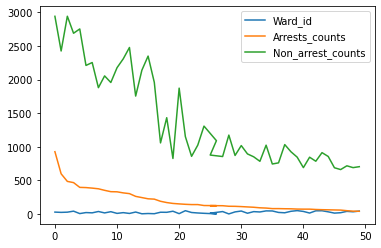

In [36]:
merge_database.plot()

In [37]:
merge_database.dtypes

Ward_id              int64
Arrests_counts       int64
Non_arrest_counts    int64
dtype: object

In [38]:
merge_database['Arrests_counts']= merge_database['Arrests_counts'].astype(float)
merge_database['Non_arrest_counts']= merge_database['Non_arrest_counts'].astype(float)


In [39]:
merge_database.dtypes

Ward_id                int64
Arrests_counts       float64
Non_arrest_counts    float64
dtype: object

In [40]:
merge_database.head()

,Ward_id,Arrests_counts,Non_arrest_counts
0,28,927.0,2942.0
1,24,598.0,2426.0
2,27,485.0,2943.0
3,42,467.0,2690.0
4,6,396.0,2754.0


<AxesSubplot:>

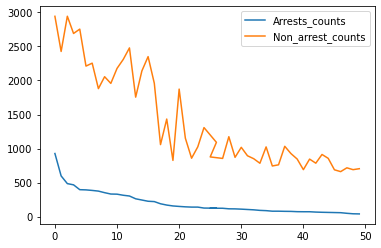

In [41]:
merge_database[['Arrests_counts', 'Non_arrest_counts']].plot()

In [42]:
merge_database.describe()

,Ward_id,Arrests_counts,Non_arrest_counts
count,50.00000,50.000000,50.000000
mean,25.50000,197.900000,1402.220000
std,14.57738,171.925263,718.261685
min,1.00000,40.000000,661.000000
25%,13.25000,78.500000,847.250000
50%,25.50000,125.000000,1029.000000
75%,37.75000,292.750000,2031.000000
max,50.00000,927.000000,2943.000000


In [43]:
d3.json("samples.json").then(function(data){
    console.log("hello");
});

SyntaxError: invalid syntax (<ipython-input-43-c50a5e044773>, line 1)